In [1]:
import tensorflow as tf

In [3]:
help(tf.abs)

Help on function abs in module tensorflow.python.ops.math_ops:

abs(x, name=None)
    Computes the absolute value of a tensor.
    
    Given a tensor of real numbers `x`, this operation returns a tensor
    containing the absolute value of each element in `x`. For example, if x is
    an input element and y is an output element, this operation computes
    \\(y = |x|\\).
    
    Args:
      x: A `Tensor` or `SparseTensor` of type `float32`, `float64`, `int32`, or
        `int64`.
      name: A name for the operation (optional).
    
    Returns:
      A `Tensor` or `SparseTensor` the same size and type as `x` with absolute
        values.



In [14]:
# initialize variables/model parameters
W = tf.Variable(tf.zeros([2, 1]), name="weights")
b = tf.Variable(0., name="bias")

In [15]:
def inference(X):
    return tf.matmul(X, W) + b

In [16]:
def loss(X, Y):
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))

In [17]:
def inputs():
    weight_age = [[84, 46], [73, 20], [65, 52], [70, 30], [76, 57], [69, 25], [63, 28], [72, 36], [79, 57], [75, 44], [27, 24], [89, 31], [65, 52], [57, 23], [59, 60], [69, 48], [60, 34], [79, 51], [75, 50], [82, 34], [59, 46], [67, 23], [85, 37], [55, 40], [63, 30]]
    blood_fat_content = [354, 190, 405, 263, 451, 302, 288, 385, 402, 365, 209, 290, 346, 254, 395, 434, 220, 374, 308, 220, 311, 181, 274, 303, 244]

    return tf.to_float(weight_age), tf.to_float(blood_fat_content)

In [18]:
def train(total_loss):
    learning_rate = 0.0000001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

In [19]:
def evaluate(sess, X, Y):
    print (sess.run(inference([[80., 25.]]))) # ~ 303
    print (sess.run(inference([[65., 25.]]))) # ~ 256

In [21]:
X,Y = inputs()

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [24]:
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [25]:
iris = datasets.load_iris()


In [28]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [29]:
x_vals = np.array([x[3] for x in iris.data])

In [30]:
x_vals

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.4,  0.3,  0.2,  0.2,  0.1,  0.2,
        0.2,  0.1,  0.1,  0.2,  0.4,  0.4,  0.3,  0.3,  0.3,  0.2,  0.4,
        0.2,  0.5,  0.2,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.4,  0.1,
        0.2,  0.1,  0.2,  0.2,  0.1,  0.2,  0.2,  0.3,  0.3,  0.2,  0.6,
        0.4,  0.3,  0.2,  0.2,  0.2,  0.2,  1.4,  1.5,  1.5,  1.3,  1.5,
        1.3,  1.6,  1. ,  1.3,  1.4,  1. ,  1.5,  1. ,  1.4,  1.3,  1.4,
        1.5,  1. ,  1.5,  1.1,  1.8,  1.3,  1.5,  1.2,  1.3,  1.4,  1.4,
        1.7,  1.5,  1. ,  1.1,  1. ,  1.2,  1.6,  1.5,  1.6,  1.5,  1.3,
        1.3,  1.3,  1.2,  1.4,  1.2,  1. ,  1.3,  1.2,  1.3,  1.3,  1.1,
        1.3,  2.5,  1.9,  2.1,  1.8,  2.2,  2.1,  1.7,  1.8,  1.8,  2.5,
        2. ,  1.9,  2.1,  2. ,  2.4,  2.3,  1.8,  2.2,  2.3,  1.5,  2.3,
        2. ,  2. ,  1.8,  2.1,  1.8,  1.8,  1.8,  2.1,  1.6,  1.9,  2. ,
        2.2,  1.5,  1.4,  2.3,  2.4,  1.8,  1.8,  2.1,  2.4,  2.3,  1.9,
        2.3,  2.5,  2.3,  1.9,  2. ,  2.3,  1.8])

In [31]:
y_vals = np.array([y[0] for y in iris.data])

In [32]:
y_vals

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

In [33]:
batch_size = 25

In [34]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [35]:
# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [36]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [37]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [39]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [40]:
my_opt = tf.train.GradientDescentOptimizer(0.05)

In [41]:
train_step = my_opt.minimize(loss)

In [42]:
# Training loop
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25 A = [[ 1.86538982]] b = [[ 3.24608445]]
Loss = 1.07648
Step #50 A = [[ 1.44703341]] b = [[ 3.8815465]]
Loss = 0.431488
Step #75 A = [[ 1.22449696]] b = [[ 4.24575472]]
Loss = 0.275474
Step #100 A = [[ 1.04554486]] b = [[ 4.47205067]]
Loss = 0.275653


In [43]:
len(x_vals)

150

In [44]:
rand_y 

array([[ 6.3],
       [ 6.7],
       [ 6. ],
       [ 5.7],
       [ 5.6],
       [ 6.3],
       [ 6.3],
       [ 6.6],
       [ 5.2],
       [ 4.9],
       [ 5.1],
       [ 5.8],
       [ 4.5],
       [ 5.2],
       [ 6.3],
       [ 6.8],
       [ 6.2],
       [ 6.3],
       [ 5.1],
       [ 6.4],
       [ 5.5],
       [ 6.3],
       [ 5.8],
       [ 6. ],
       [ 5.6]])

In [45]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

In [46]:
slope

array([ 1.04554486], dtype=float32)

In [47]:
y_intercept

array([ 4.47205067], dtype=float32)

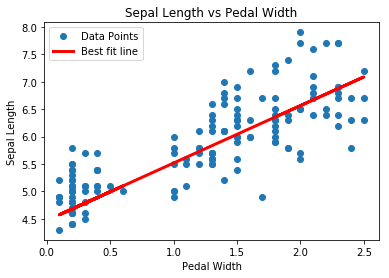

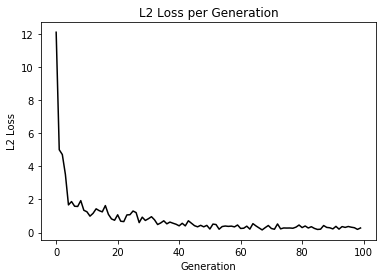

In [48]:
# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()